#**WordCloud**

##In this notebook we create two words clouds based on the frequency of a word in a corpus. We will be using two datasets. Both of which are in the repository under the folder named Data which is present in the same directory as this notebook.

In [0]:
#Importing the data
from google.colab import files
uploaded = files.upload()


Saving Chapter4.txt to Chapter4 (1).txt
Saving sts_gold_tweet.csv to sts_gold_tweet.csv


In [0]:
#reading the twitter data
import pandas as pd 
df_tweets = pd.read_csv("sts_gold_tweet.csv",delimiter=";")

#reading the text from Chapter4(minus references)
file = open('Chapter4.txt',mode='r')
ch4_raw = file.read()
file.close()

###Twitter data is quite large so for this example we will consider only 200-300 tweets

In [0]:
df_tweets.head()

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...


In [0]:
df_tweets.shape

(2034, 3)

In [0]:
df_tweets = df_tweets.iloc[1750:]

In [0]:
df_tweets.shape

(284, 3)

In [0]:
#Adding the 284 tweets into a list
corpus_split = list(df_tweets['tweet'])

In [0]:
#helper function which concatenates all the data into a single corpus
def concatenate_list_data(list):
    result= ''
    for element in list:
        result += str(element)
    return result


In [0]:
corpus_twitter = concatenate_list_data(corpus_split)
corpus_twitter[:10000]

"I wish i was going to a Taylor Swift concert this summer...Sigh.. @taylorswift13 please come back to australia taylor!!! i missed going to sydney concert as i was sick with bronchitis I really need to stop checking my Facebook every 3 seconds hoping there's a message from Kyle Up for DMB, dr., then slept all day. Have a fever, no big deal, but Dad couldn't come down tonight.  Here's hoping for next weekend!@Kianasaurus - Bear just crunched my leg @sanasaleem should have turned me into muffin No C&amp;O youtube video.    At least not today.@rjman23 waiting for the iPod touch 3.0 jailbreak for pc to come out....itouch4life said it's not gonna be out today @TikkaMadsen @gogomago what are you two up to?  Ah shit, Miguel's gone?   I wonder if he blames Obama for Twitter, LOL...Well there goes my hope of seeing a lebron-kobe faceoff in the finals... Good riddance &amp; good nite It's not fair no one I like tours England Doing homework  cannot be bothered. Putting my PSP on ebay as i don't n

In [0]:
# load text
# split into words by white space
ch4_raw = ch4_raw.split()
corpus_twitter = corpus_twitter.split()

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped_ch4 = [w.translate(table) for w in ch4_raw]
stripped_twitter = [w.translate(table) for w in corpus_twitter]

#detokenizing all the words(we could call our concatenate_list_data function here)
from nltk.tokenize.treebank import TreebankWordDetokenizer
TreebankWordDetokenizer().detokenize(stripped_ch4)
TreebankWordDetokenizer().detokenize(stripped_twitter)


'I wish i was going to a Taylor Swift concert this summerSigh taylorswift13 please come back to australia taylor i missed going to sydney concert as i was sick with bronchitis I really need to stop checking my Facebook every 3 seconds hoping theres a message from Kyle Up for DMB dr then slept all day Have a fever no big deal but Dad couldnt come down tonight Heres hoping for next weekendKianasaurus  Bear just crunched my leg sanasaleem should have turned me into muffin No CampO youtube video At least not todayrjman23 waiting for the iPod touch 30 jailbreak for pc to come outitouch4life said its not gonna be out today TikkaMadsen gogomago what are you two up to Ah shit Miguels gone I wonder if he blames Obama for Twitter LOLWell there goes my hope of seeing a lebronkobe faceoff in the finals Good riddance amp good nite Its not fair no one I like tours England Doing homework cannot be bothered Putting my PSP on ebay as i dont need and i need some moneyTKayla Beware Atlantic City casinos 

In [0]:
#Appending all the data int he list to a string
string_ch4=' '
string_twitter=' '
string_ch4 = string_ch4.join(stripped_ch4)
string_twitter = string_twitter.join(stripped_twitter)

In [0]:
#importing necessary NLTK packages

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')

#setting stopwords to english
stop_words = set(stopwords.words('english'))


#tokenizing the string
word_tokens_ch4 = word_tokenize(string_ch4)
word_tokens_twitter = word_tokenize(string_twitter)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#removing all the stop words
filtered_corpus_ch4 = [w for w in word_tokens_ch4 if not w in stop_words]
filtered_corpus_twitter = [w for w in word_tokens_twitter if not w in stop_words]

In [0]:
#calculating the frequency of each word
wordfreq_ch4=[filtered_corpus_ch4.count(p) for p in filtered_corpus_ch4]
result_ch4 = dict(zip(filtered_corpus_ch4,wordfreq_ch4))

wordfreq_twitter=[filtered_corpus_twitter.count(p) for p in filtered_corpus_twitter]
result_twitter = dict(zip(filtered_corpus_twitter,wordfreq_twitter))

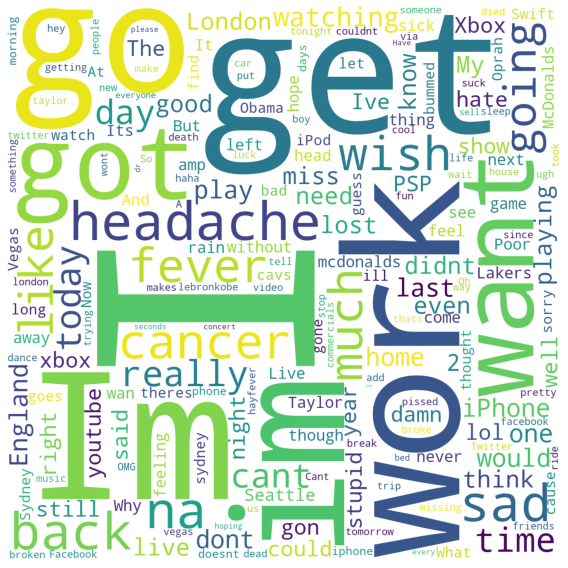

In [0]:
#finally lets plot the wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

wordcloud = WordCloud(width = 1200, height = 1200, background_color="white",min_font_size =10).generate_from_frequencies(result_twitter)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
  
plt.show()

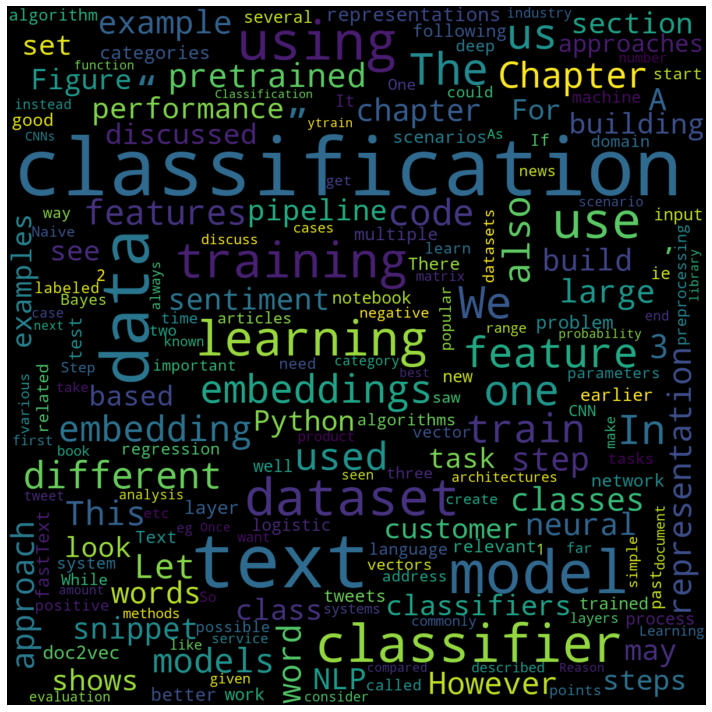

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 


wordcloud = WordCloud(width = 1200, height = 1200, min_font_size =10).generate_from_frequencies(result_ch4)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout() 
  
plt.show()

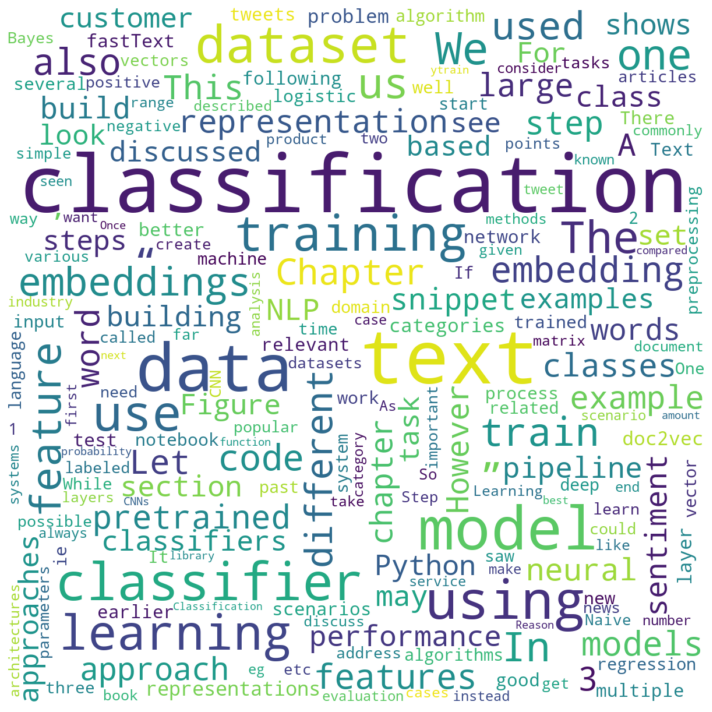

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 


wordcloud = WordCloud(width = 1200, height = 1200,background_color="white", min_font_size =10).generate_from_frequencies(result_ch4)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout() 
  
plt.show()

In [0]:
#custom word cloud
from PIL import Image
import numpy as np
import urllib
import requests


def generate_wordcloud(words, mask):
    wordcloud = WordCloud(width = 1200, height = 1200,background_color="white", min_font_size =10,mask=mask).generate_from_frequencies(words)    
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

#### Recreate the same word clouds in various shapes

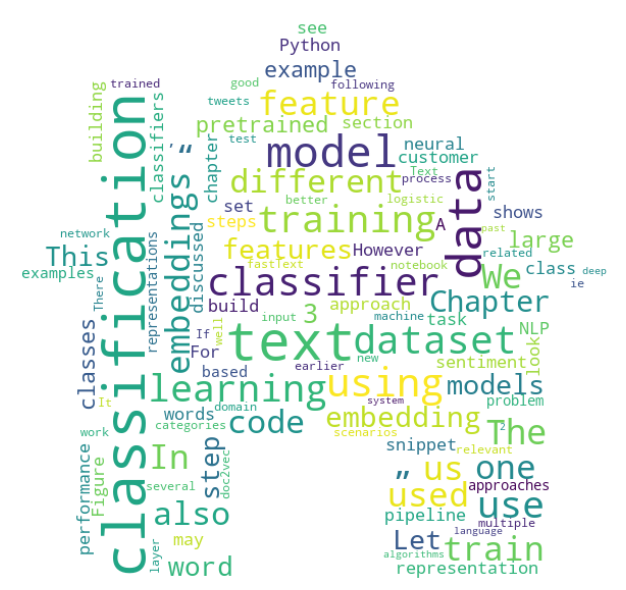

In [0]:
mask_house = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))
generate_wordcloud(result_ch4, mask_house)

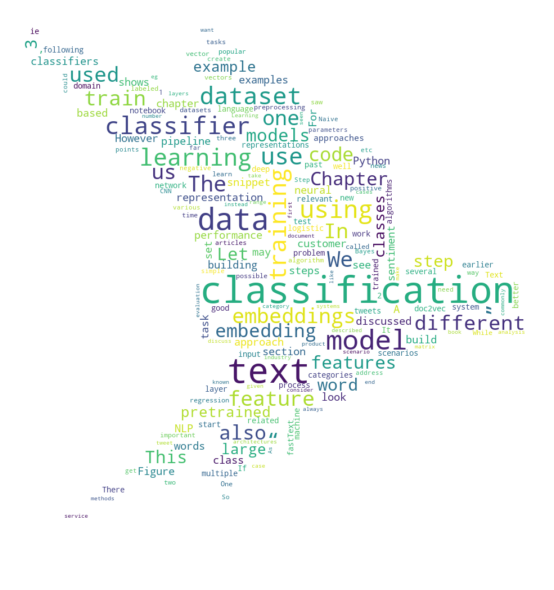

In [0]:
mask_circle = np.array(Image.open(requests.get('https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_960,f_auto/DCTM_Penguin_UK_DK_AL526630_wkmzns.jpg', stream=True).raw))
generate_wordcloud(result_ch4, mask_circle)

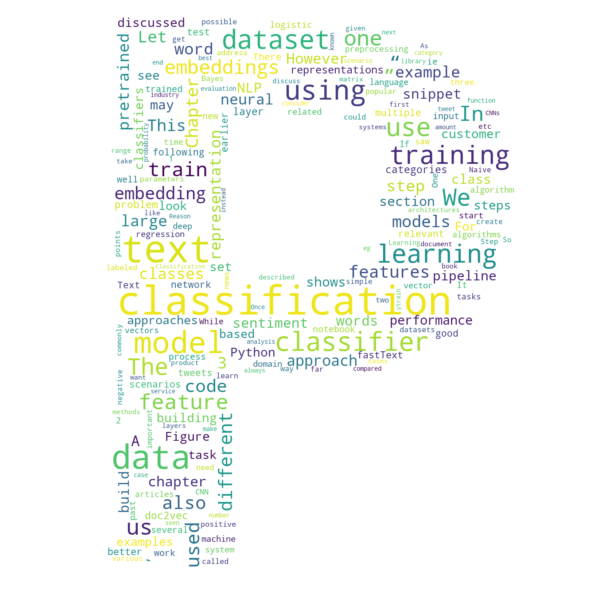

In [0]:
https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_960,f_auto/DCTM_Penguin_UK_DK_AL526630_wkmzns.jpgmask_circle = np.array(Image.open(requests.get('https://previews.123rf.com/images/frescomovie/frescomovie1201/frescomovie120100042/11918955-letter-p-made-from-red-blood-cells-isolated-on-a-white-.jpg', stream=True).raw))
generate_wordcloud(result_ch4, mask_circle)
